In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
data = pd.read_csv('ethereum_daily_data_2018_2024.csv')
data

,time,Open,High,Low,Close,Volume
0,2018-01-01,741.69,766.49,718.90,757.22,910875.63
1,2018-01-02,756.17,882.61,756.17,861.97,1123318.86
2,2018-01-03,861.97,951.70,847.90,941.10,871172.13
3,2018-01-04,941.00,997.44,901.03,944.83,822844.78
4,2018-01-05,944.50,1165.81,926.75,963.88,1682729.53
...,...,...,...,...,...,...
2457,2024-09-22,2613.27,2632.42,2525.50,2581.43,433318.91
2458,2024-09-23,2581.43,2703.72,2540.14,2647.17,797788.43
2459,2024-09-24,2647.17,2671.47,2591.67,2653.41,564932.40
2460,2024-09-25,2653.41,2673.98,2554.44,2579.69,458195.34


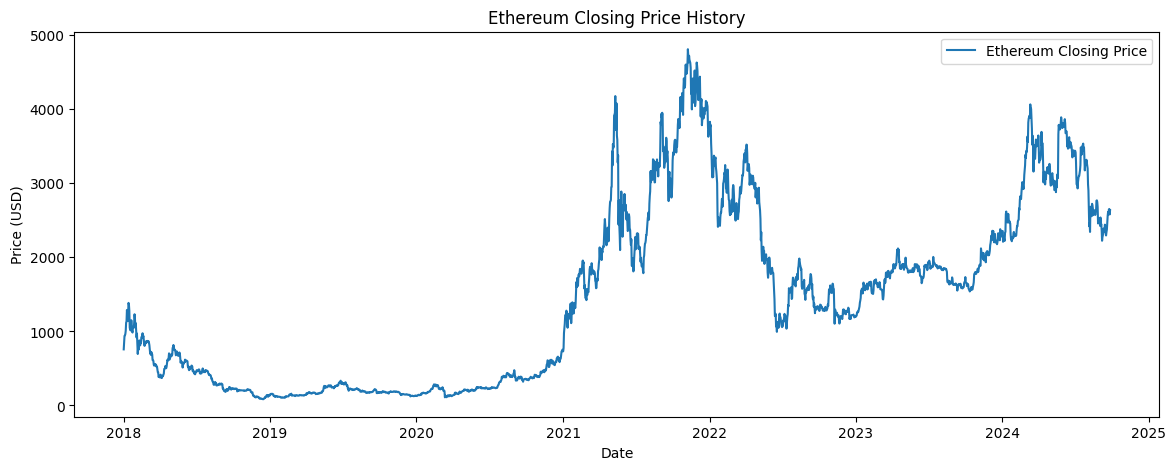

In [ ]:
data['time'] = pd.to_datetime(data['time'])

data.set_index('time', inplace=True)

plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='Ethereum Closing Price')
plt.title('Ethereum Closing Price History')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length, 0])
    return np.array(sequences), np.array(labels)

sequence_length = 60

train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [ ]:

model = Sequential()

model.add(Input(shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=25))
model.add(Dense(units=1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=70, batch_size=84, validation_data=(X_test, y_test))

Epoch 1/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 0.0321 - val_loss: 0.0028
Epoch 2/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0039 - val_loss: 0.0020
Epoch 3/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0028 - val_loss: 0.0020
Epoch 4/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 5/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 6/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 8/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 9/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 11/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 12/70
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0

In [ ]:
predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions)

y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# MAE
mae = mean_absolute_error(y_test_scaled, predictions)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, predictions))

# MAPE (con protezione contro divisioni per zero)
mape = np.mean(np.abs((y_test_scaled - predictions) / np.clip(y_test_scaled, 1e-10, None))) * 100

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Mean Absolute Error (MAE): 67.16
Root Mean Squared Error (RMSE): 100.61
Mean Absolute Percentage Error (MAPE): 2.49%


In [ ]:
last_60_days = data['Close'][-sequence_length:].values.reshape(-1, 1)

last_60_days_scaled = scaler.transform(last_60_days)

X_predict = []
X_predict.append(last_60_days_scaled)

X_predict = np.array(X_predict)
X_predict = np.reshape(X_predict, (X_predict.shape[0], X_predict.shape[1], 1))

predicted_price = model.predict(X_predict)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted Ethereum Price: {predicted_price[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Ethereum Price: 2609.4912109375


In [ ]:
results_df = pd.DataFrame({
    'Metric': ['Total Data Points', 'Training Data Points', 'Testing Data Points',
               'Root Mean Squared Error (MSE)','Mean Absolute Error (MAE)', 'Mean Absolute Percentage Error (MAPE)', 'First Actual Price', 'First Predicted Price',
               'Last Actual Price', 'Last Predicted Price', 'Predicted Future Price'],
    'Value': [len(data), len(X_train), len(X_test),
              rmse, mae, mape, y_test_scaled[0][0], predictions[0][0],
              y_test_scaled[-1][0], predictions[-1][0], predicted_price[0][0]]
})

# Markdown
print(results_df.to_markdown())

|    | Metric                                |      Value |
|---:|:--------------------------------------|-----------:|
|  0 | Total Data Points                     | 2462       |
|  1 | Training Data Points                  | 1909       |
|  2 | Testing Data Points                   |  433       |
|  3 | Root Mean Squared Error (MSE)         |  100.614   |
|  4 | Mean Absolute Error (MAE)             |   67.16    |
|  5 | Mean Absolute Percentage Error (MAPE) |    2.49154 |
|  6 | First Actual Price                    | 1866.58    |
|  7 | First Predicted Price                 | 1878.39    |
|  8 | Last Actual Price                     | 2636.51    |
|  9 | Last Predicted Price                  | 2616.42    |
| 10 | Predicted Future Price                | 2609.49    |


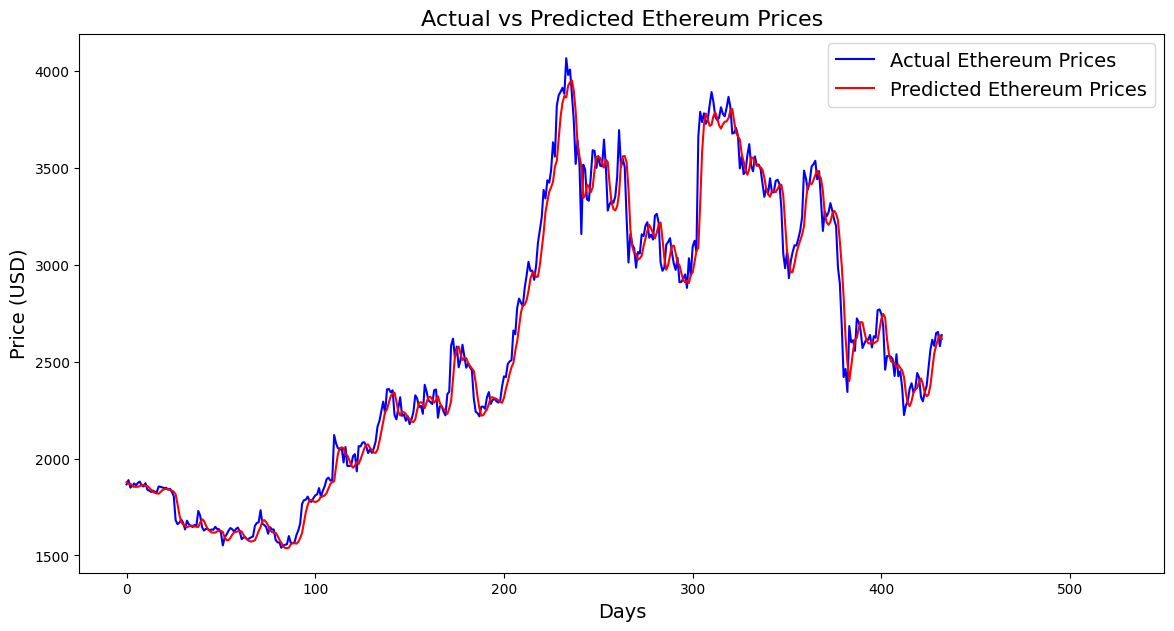

In [ ]:
plt.figure(figsize=(14, 7))

plt.plot(y_test_scaled, label='Actual Ethereum Prices', color='blue')

plt.plot(predictions, label='Predicted Ethereum Prices', color='red')

plt.title('Actual vs Predicted Ethereum Prices', fontsize = 16)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Price (USD)', fontsize = 14)
plt.xlim(-25, 550)
plt.legend(fontsize = 14)

plt.show()